In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

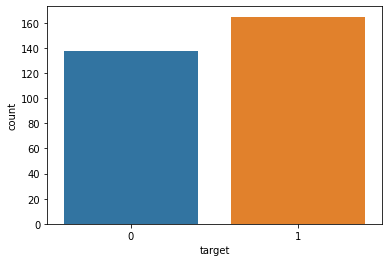

In [5]:
sns.countplot(df.target)


In [17]:
y = df['target'].values
x = df.drop(['target'], axis = 1)

ss = StandardScaler()
x = ss.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### kNN
selection of k:
1.An odd number if the number of classes is 2
2.Another simple approach to select k is set k = sqrt(n). where n = number of data points in training data.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
train_score, test_score = [], []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)
    

In [20]:
max_score = max(test_score)
test_ind = [i for i, v in enumerate(test_score) if v == max_score]
test_ind

[15]

In [21]:
print('max test score {} and k = {}'.format(max_score, list(map(lambda x: x+1, test_ind))))

max test score 0.9120879120879121 and k = [16]


In [24]:
knn = KNeighborsClassifier(16)
knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8207547169811321, 0.9120879120879121)

In [26]:
y_pred = knn.predict(X_test)

pd.crosstab(y_test, y_pred, rownames=['actuals'], colnames=['predicted'], margins=True)

predicted,0,1,All
actuals,,,
0,35,6,41
1,2,48,50
All,37,54,91


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.89      0.96      0.92        50

    accuracy                           0.91        91
   macro avg       0.92      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



In [32]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]

In [33]:
y_pred_proba

array([0.8125, 0.4375, 0.5625, 0.3125, 0.625 , 0.9375, 1.    , 0.9375,
       0.25  , 0.9375, 0.75  , 0.75  , 0.8125, 0.375 , 0.8125, 0.375 ,
       0.1875, 0.9375, 0.9375, 0.5   , 0.6875, 0.625 , 0.25  , 0.9375,
       0.625 , 0.    , 0.25  , 0.875 , 0.3125, 0.4375, 0.5625, 0.1875,
       0.8125, 0.875 , 0.6875, 0.375 , 0.9375, 0.9375, 0.9375, 0.9375,
       1.    , 0.4375, 0.625 , 1.    , 0.9375, 0.625 , 0.25  , 0.75  ,
       0.8125, 0.    , 0.1875, 0.0625, 0.1875, 0.5   , 0.8125, 0.125 ,
       0.9375, 0.625 , 0.8125, 0.9375, 0.25  , 0.1875, 0.0625, 0.75  ,
       0.8125, 0.5   , 0.8125, 0.0625, 0.75  , 0.9375, 0.75  , 0.0625,
       0.    , 0.875 , 0.75  , 0.9375, 0.875 , 0.1875, 0.625 , 0.6875,
       0.4375, 0.4375, 0.875 , 0.25  , 0.6875, 0.    , 0.    , 0.875 ,
       0.3125, 0.875 , 0.3125])

In [39]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

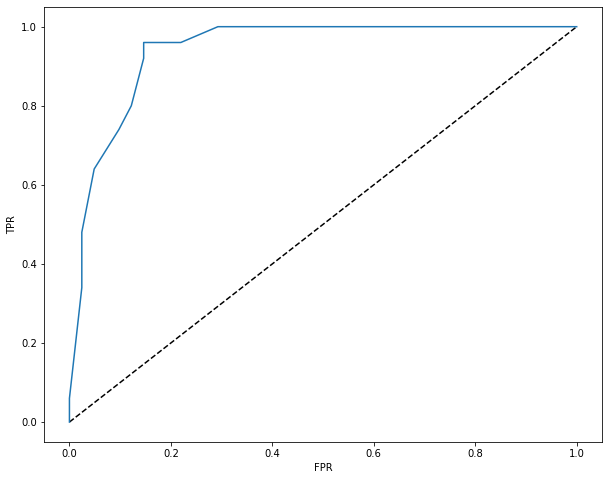

In [42]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [43]:
roc_auc_score(y_test,y_pred_proba)

0.941219512195122

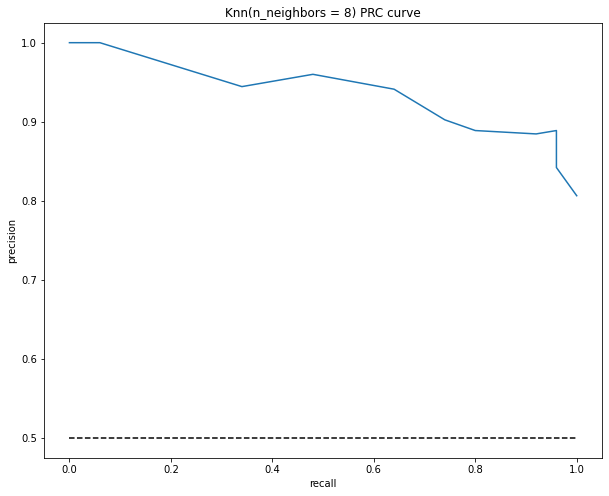

In [44]:
precision,recall,threshold=precision_recall_curve(y_test,y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [45]:
auc_prc = auc(recall, precision)
auc_prc

0.9383995425292544